# 회귀 트리

- 머신러닝 기반의 회귀 : 회귀 계수를 기반으로 하는 최적 회귀 함수 도출이 목표
- 트리 기반 : 회귀 트리 기반으로 회귀 예측
    - 리프 노드에 속한 데이터값의 평균값을 구해 회귀 예측값을 계산
    
## CART(Classification And Regression Tree)

- GBM, XGBoost, LightGBM, DecisionTree 등
    - GBM -> 회귀 : GradientBoostingRegression, 분류 : GradientBoostingClassifier
    - XGBoost -> 회귀 : XGBRegressor, 분류 : XGBClassifier
    - LightGBM -> 회귀 : LGBMRegressor, 분류 : LGBMClassifier
    - DecisionTree -> 회귀 : DecisionTreeRegressor, 분류 : DecisionTreeClassifier

**RandomForestRegressor**로 보스톤 주택가격 예측

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

boston_df['PRICE'] = boston.target
y_target = boston_df['PRICE']
X_features = boston_df.drop(['PRICE'], axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_features, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.423 


In [2]:
def model_cv_pred(model, X_features, y_target):
    neg_mse_scores = cross_val_score(model, X_features, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    model_cv_pred(model, X_features, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.423 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269 
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.251 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.646 


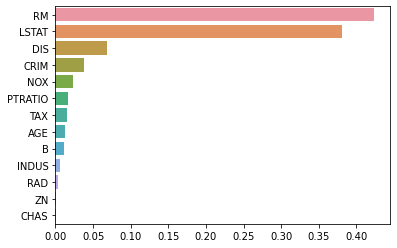

In [4]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_features, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_features.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

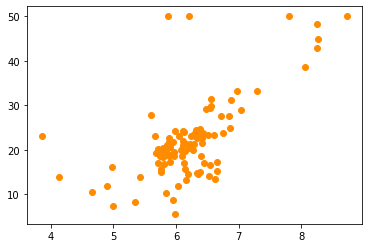

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

importance_sample = boston_df[['RM','PRICE']]
importance_ft = importance_sample.sample(n=100,random_state=0)
plt.figure()
plt.scatter(importance_ft.RM, importance_ft.PRICE,c='darkorange')

- LinearRegression과 DecisionTreeRegressor의 max_depth = 4,7 로 학습

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
dt_reg_4 = DecisionTreeRegressor(max_depth=4)
dt_reg_7 = DecisionTreeRegressor(max_depth=7)
# 예측적용할 4.5~8.5까지 100개 데이터 생성
X_test = np.arange(4.5,8.5,0.04).reshape(-1,1)

X_feature = importance_ft['RM'].values.reshape(-1,1)
y_target = importance_ft['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature, y_target)
dt_reg_4.fit(X_feature,y_target)
dt_reg_7.fit(X_feature,y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt4 = dt_reg_4.predict(X_test)
pred_dt7 = dt_reg_7.predict(X_test)

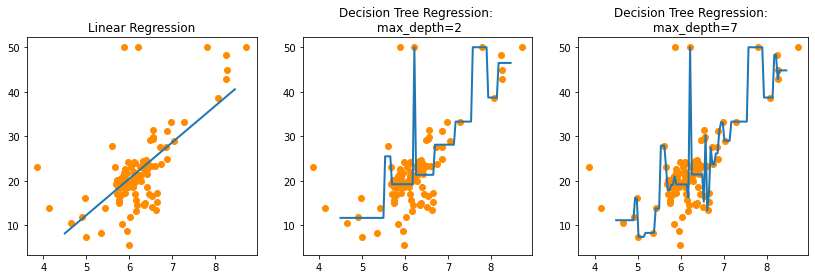

In [13]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(importance_ft.RM, importance_ft.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(importance_ft.RM, importance_ft.PRICE, c="darkorange")
ax2.plot(X_test, pred_dt4, label="max_depth:4", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(importance_ft.RM, importance_ft.PRICE, c="darkorange")
ax3.plot(X_test, pred_dt7, label="max_depth:7", linewidth=2)

- DecisionTreeRegressor의 max_depth 4와 7의 모델은 outlier 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 모델